In this project I use Python 3 and Natural Language Processing to build a spam detection filter. I use a dataset from UCI's Machine Learning repository which contains a collection of over 5000 sms phone messages of spam and ham (normal text message). 

In the beginning I modify, analyze, and visualize the data. In the second part, I begin to preprocess the data. The data is in the text format of strings, and our classification algorithm need numerical feature vector to perform classification task. Bag of words is a method in which each unique word in the text is represented as one number. I use CountVectorizer, Tdidftransformer, and Multinomial NB, all to perform the pre processing (bag of words method, term fand classification,

In [1]:
import nltk

In [2]:
#nltk.download_shell() stopwords library needed

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages)) #grabs a list of only messages

5574


In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

viewing messages first lines

In [6]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

By printing the first ten messages I can see some are actually real text messages, while others are spam and claim the user as a winner or try to get your money.

The spacing in text 8 indicates that it is a TSV (tab separated values file)

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


I use pandas library to separate the text and create a nice dataframe separated by a labels column and message column wherever a tab occurs. Otherwise I would have to manually parse the entire TSV file.

# Exploratory Data Analysis

In [10]:
messages.describe() # can see that there are repeated common text message by unique row

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Here I can analyze how many spam vs ham messages and the most common text message strings in these messages

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

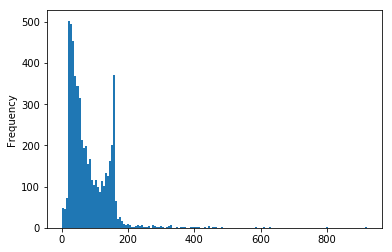

In [15]:
messages['length'].plot.hist(bins=150)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.602477
std        60.119851
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       920.000000
Name: length, dtype: float64

In [17]:
messages[messages['length'] == 920]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest fallingObstacles for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

exploring outliers with pandas. The outlier appears to be a love letter sent over text which is why it has such a high character count.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D970467B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D970591780>], dtype=object)

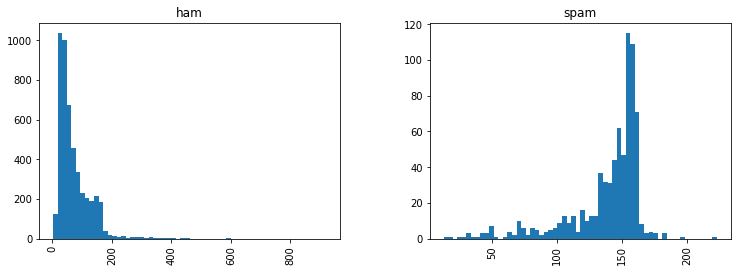

In [18]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

Ham vs Spam comparison. It appears that spam messages tend to have more characters. There seems to be an average of about 50 while spam is about 150. Visualiing the data I see that length could possibly be a good feature to use for our algorithm.

# Text Pre-processing

I need to convert text format (strings) into numbers so that our classification algrithms can use a numerical feature vector to perform the task. I first need to remove common words the, a, if, (stopwords) by utilizing NLTK library.
Next, I create a function that splits a message into individual words and returns a list. I then use apply() in pandas to process the text in the data frame.

In [19]:
import string

In [20]:
mess = 'Sample message! Notice: it has punctuation.'

In [21]:
nopunc = [c for c in mess if c not in string.punctuation] #check for punctuation

In [27]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [28]:
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')

LookupError: 
**********************************************************************
  Resource 'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'C:\\Users\\Christopher Truong/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Christopher Truong\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Christopher Truong\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Christopher Truong\\AppData\\Roaming\\nltk_data'
**********************************************************************

In [ ]:
nopunc = ''.join(nopunc)

In [ ]:
nopunc.split()

In [ ]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

iterated through the the list for word in nopunc.split if lowercase version is not in stop words it removed it and has

In [ ]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [ ]:
messages.head()

In [ ]:
messages['message'].head(5).apply(text_process)

In [ ]:
messages.head()

There are many methods for normalizing text. The reason why vectorization works well here is because our datasets has a lot of short hand and abbreviations.

# Vectorization

Now that I have each message represented as a list of tokens, I need to convert them into a vector for SciKit Learn. The bag of words model process has these steps:

1. Counting word appearance in the message (term frequency)
2. Weighing the counts (frequent tokens have lower weight this is called inverse document frequency).
3. Normalizing the vectors to unit length, to abstract from the original text length (L2 norm)

Each vector will have as many dimensions as there are unique qwords in the SMS corpus.

1. SciKit Learn count vecterizer estimator object model will convert a collection of text documents to a matrix of token counts (bag of words model)
2. Two dimentsional matrix one dimensionis entire vocabulary one row per word 
3. The other dimension are the actual documnets or a column per text message. 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [ ]:
print(len(bow_transformer.vocabulary_))

In [ ]:
mess4 = messages['message'][3]

In [ ]:
print(mess4)

In [ ]:
bow4 = bow_transformer.transform([mess4])

In [ ]:
print(bow4)

In [ ]:
print(bow4.shape)

7 unique words in message for after removing the common stop words. 2 of them appear twice everything else appears only once.

In [ ]:
bow_transformer.get_feature_names()[4068]

In [ ]:
messages_bow = bow_transformer.transform(messages['message'])

In [ ]:
print('Shape of the Sparse Matrix',messages_bow.shape)

In [ ]:
print(messages_bow.nnz)

# Term Frequency-Inverse Document Frequency

TF-IDF is a weight commonly used in information retrieval and text mining. It is a statistical measure used to evaluate the importance of a word to a document or collection. Importance increases proportionally to its appearances in the document; however, is offset by the frequency in the corpus. This is used to often in search engines and are a central tool in scores and rank of a documents relevance for user queries. 

Typically has two terms: first term computes number of appearances in the document divided by total words in the document.
The second term is the Inverse Document Frequency which is computed as the logarithm of the number of documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)

In [25]:
print(tfidf4)

NameError: name 'tfidf4' is not defined

Transformed simple word count into term frequency inverse document frequency. Interpreted as weight values.

In [26]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

NameError: name 'tfidf_transformer' is not defined

In [63]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


# Training a Model

I've set up the messages as vectors now I move on with training the spam and ham classifier. The algorithm used is the Naive Bayes classifier.

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [66]:
spam_detect_model.predict(tfidf4)[0]    #testing it on a single message

'ham'

In [68]:
messages['label'][3]   #confirms that the model worked in this instance

'ham'

In [69]:
all_pred = spam_detect_model.predict(messages_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(messages['label'],all_pred))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



The above model was evaluated on the same data we used on training. It was to show an example but in general we never use the same dataset that was trained on. The limitations of this is that we don't know the predictive power of new messages. In order to truly evaluate a train test split needs to be performed. 

# Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'],test_size=0.3)

In [74]:
msg_train

4242                 Detroit. The home of snow. Enjoy it.
2370    A Boy loved a gal. He propsd bt she didnt mind...
5235    Am on the uworld site. Am i buying the qbank o...
2581    U are subscribed to the best Mobile Content Se...
4905    no, i *didn't* mean to post it. I wrote it, an...
2836    Ya they are well and fine., BBD(pooja) full pi...
107           Aight, I'll hit you up when I get some cash
4592    Well done ENGLAND! Get the official poly ringt...
4841    PRIVATE! Your 2003 Account Statement for shows...
2193    Congrats ! Treat pending.i am not on mail for ...
4436    Don't b floppy... b snappy & happy! Only gay c...
313     He says he'll give me a call when his friend's...
1086    FR'NDSHIP is like a needle of a clock. Though ...
2007    Shopping lor. Them raining mah hard 2 leave or...
5127                      Cuz ibored. And don wanna study
4609                  We live in the next  &lt;#&gt; mins
5261    I absolutely LOVE South Park! I only recently ...
4163    How's 

In [75]:
from sklearn.pipeline import Pipeline

In [80]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [81]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a11e7cf28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [82]:
predictions = pipeline.predict(msg_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1450
       spam       1.00      0.70      0.83       222

avg / total       0.96      0.96      0.96      1672



pipeline method streamlines the previous transformation steps for all the data. We can directly pass message text data and pipeline will do the pre-processing. The classification report for our true testing set indicates a high accuracy rate!